In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def pca(X, k=2):
    # Step 1: Mean Centering
    X_meaned = X - np.mean(X, axis=0)

    # Step 2: Covariance Matrix
    cov_mat = np.cov(X_meaned, rowvar=False)

    # Step 3: Eigen Decomposition
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # Step 4: Sort eigenvectors by eigenvalues in descending order
    sorted_idx = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[sorted_idx]
    eigen_vectors = eigen_vectors[:, sorted_idx]

    # Step 5: Select top-k eigenvectors
    eigen_vectors_k = eigen_vectors[:, :k]

    # Step 6: Project the data
    X_reduced = np.dot(X_meaned, eigen_vectors_k)

    return X_reduced, eigen_values, eigen_vectors_k

In [22]:
# fetching data
df = pd.read_csv("/content/drive/MyDrive/ML/Dataset/synthetic_gene_expression.csv")
df.drop(columns=['Unnamed: 0', "Condition"], inplace=True)
# df["Condition"].map({'Class_0': 1, 'Class_1': 2, 'Class_2': 3})

df.head()
# print(df.dtypes)

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_491,Gene_492,Gene_493,Gene_494,Gene_495,Gene_496,Gene_497,Gene_498,Gene_499,Gene_500
0,2.085124,1.697055,0.832972,-1.610996,-0.841835,0.070294,-8.783960,1.172982,-0.048724,-1.891240,...,1.023043,-0.271650,0.419226,-1.870441,0.852270,-0.650489,1.902909,0.395418,-0.200375,-0.079326
1,0.235898,-0.077348,0.510869,0.494532,0.186213,-0.278624,-2.363370,0.154143,-0.625600,1.227535,...,0.475158,-1.502684,-1.119290,0.228057,-0.061754,0.694210,0.071793,-0.180621,-1.755328,-1.564012
2,-0.314513,-2.088344,1.886601,3.460123,0.892379,0.186852,0.815672,0.453642,0.053473,-0.777173,...,-0.581056,0.459973,-1.102686,-1.917586,-1.662961,-1.419520,1.263739,-0.496230,-0.375258,0.657784
3,0.942842,1.275982,0.275058,-0.123766,0.670660,-1.079931,-5.267186,0.339994,0.635600,-1.099207,...,1.835574,-0.177201,1.067677,0.044200,-0.362132,0.125536,-0.259836,0.221823,1.182649,0.336889
4,0.202556,-0.345857,0.098395,0.036536,0.513560,-0.299023,-4.818114,-0.435399,-0.526347,0.265764,...,-0.629573,-0.038837,-0.237170,0.398624,-0.872615,-0.635552,0.267018,0.406784,-0.447352,2.108931


In [23]:
# converting data
X = df.to_numpy()

In [24]:
# Apply PCA
X_pca, eigen_vals, pcs = pca(X, k=1)

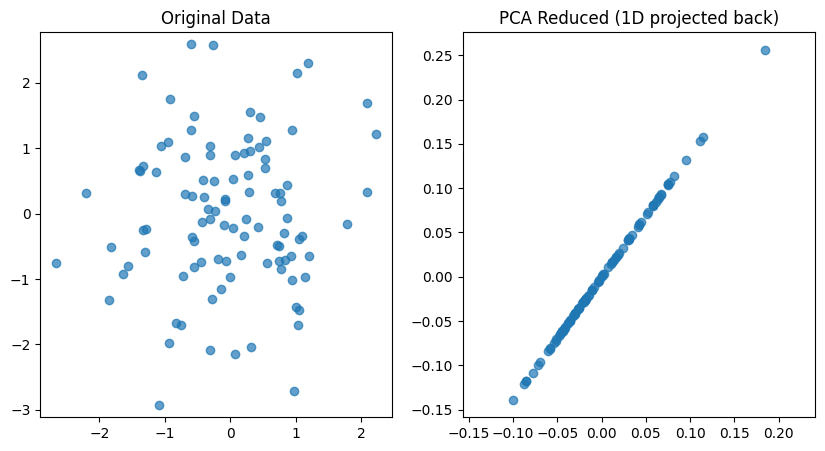

In [25]:
# Plot original vs PCA
plt.figure(figsize=(10, 5))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original Data")
plt.axis('equal')

# PCA-reduced (projected back for visualization)
plt.subplot(1, 2, 2)
X_proj_back = np.dot(X_pca, pcs.T)
plt.scatter(X_proj_back[:, 0], X_proj_back[:, 1], alpha=0.7)
plt.title("PCA Reduced (1D projected back)")
plt.axis('equal')

plt.show()